In [2]:
import mdtraj as md
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

/home/robarbon/anaconda3/envs/science/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
trajs = [md.load('/home/robarbon/msmbuilder_data/fs_peptide/trajectory-{}.xtc'.format(i+1), top='/home/robarbon/msmbuilder_data/fs_peptide/fs-peptide.pdb', stride=10) 
         for i in range(28)]

/home/robarbon/anaconda3/envs/science/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [5]:
dssps = []
i=0
for traj in trajs:
    print(i)
    i += 1
    dssp = md.compute_dssp(traj, simplified=False)
    dssps.append(dssp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [6]:
dssps[0]

array([['NA', ' ', ' ', ..., 'G', ' ', 'NA'],
       ['NA', ' ', ' ', ..., 'T', ' ', 'NA'],
       ['NA', ' ', ' ', ..., 'T', ' ', 'NA'],
       ..., 
       ['NA', ' ', ' ', ..., 'B', ' ', 'NA'],
       ['NA', ' ', 'T', ..., 'B', ' ', 'NA'],
       ['NA', ' ', ' ', ..., 'B', ' ', 'NA']], 
      dtype='<U2')

In [7]:
dssps[0].shape

(1000, 23)

In [8]:
helix_pcs = []
for dssp in dssps:
    helix_pc = np.mean((dssp=='H')*1, axis=1)
    helix_pcs.append(helix_pc)
    

In [9]:
helix_pcs[0].shape

(1000,)

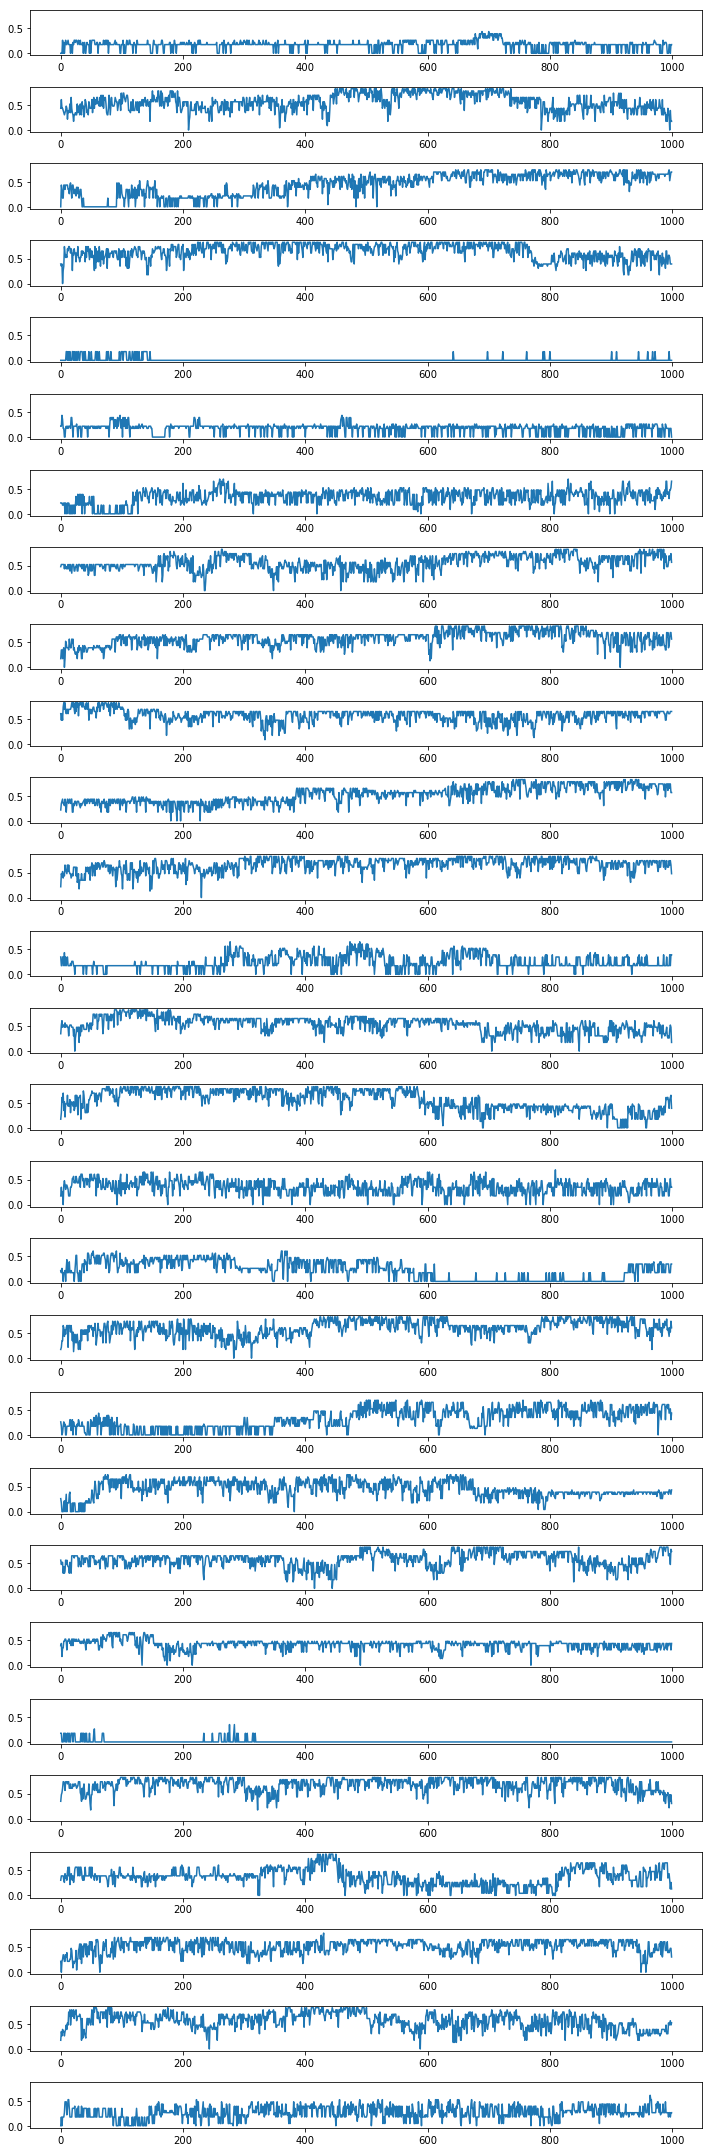

In [10]:
fig, ax = plt.subplots(28, figsize=(10,30), sharey=True)
for idx, helix_pc in enumerate(helix_pcs):
    ax[idx].plot(helix_pc)
    
plt.tight_layout()

In [11]:
for idx, helix_pc in enumerate(helix_pcs):
    print('Trajectory Number : {0} at frame :  {1} with coil fraction {2:4.2f} %'.format(idx+1, 
                                                                                  np.argmax(helix_pc), 
                                                                                  100*np.max(helix_pc)))

Trajectory Number : 1 at frame :  689 with coil fraction 43.48 %
Trajectory Number : 2 at frame :  449 with coil fraction 82.61 %
Trajectory Number : 3 at frame :  646 with coil fraction 73.91 %
Trajectory Number : 4 at frame :  224 with coil fraction 82.61 %
Trajectory Number : 5 at frame :  9 with coil fraction 17.39 %
Trajectory Number : 6 at frame :  2 with coil fraction 43.48 %
Trajectory Number : 7 at frame :  260 with coil fraction 69.57 %
Trajectory Number : 8 at frame :  263 with coil fraction 82.61 %
Trajectory Number : 9 at frame :  613 with coil fraction 82.61 %
Trajectory Number : 10 at frame :  5 with coil fraction 82.61 %
Trajectory Number : 11 at frame :  740 with coil fraction 82.61 %
Trajectory Number : 12 at frame :  301 with coil fraction 82.61 %
Trajectory Number : 13 at frame :  277 with coil fraction 65.22 %
Trajectory Number : 14 at frame :  88 with coil fraction 82.61 %
Trajectory Number : 15 at frame :  75 with coil fraction 82.61 %
Trajectory Number : 16 at f

In [14]:
ref_traj = md.load('/home/robarbon/msmbuilder_data/fs_peptide/trajectory-2.xtc', top='/home/robarbon/msmbuilder_data/fs_peptide/fs-peptide.pdb', stride=10)

/home/robarbon/anaconda3/envs/science/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [16]:
ref_frame = ref_traj[449]
ref_frame.save('data/helix-reference.xtc')